Lipieza codigo

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier




In [13]:
df_e1 = pd.read_csv('covtype.data', header=None)
df_e1


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [14]:
columnas = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways ', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
columnas = columnas + ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']
columnas += ['Soil_Type_' + str(i) for i in range(1, 41)]
columnas += ['Cover_Type']
df_e1.columns = columnas
df_e1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [15]:
# crea la columna 'Soil_Type' sumando las columnas relacionadas a los tipos de suelo
df_e1['SOIL_TYPE'] = df_e1[[col for col in df_e1.columns if col.startswith('Soil_Type')]].sum(axis=1)

# crea la columna 'Wilderness_Area' sumando las columnas relacionadas a las áreas silvestres
df_e1['WILDERNESS_AREA'] = df_e1[[col for col in df_e1.columns if col.startswith('Wilderness_Area')]].sum(axis=1)

# elimina las columnas de Soil
df_e1 = df_e1.drop(columns=[col for col in df_e1.columns if col.startswith('Soil_Type')])

# elimina las  columnas de Wilderness
df_e1 = df_e1.drop(columns=[col for col in df_e1.columns if col.startswith('Wilderness_Area')])


df_e1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,SOIL_TYPE,WILDERNESS_AREA
0,2596,51,3,258,0,510,221,232,148,6279,5,1,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,1,1
581008,2391,152,19,67,12,95,240,237,119,845,3,1,1
581009,2386,159,17,60,7,90,236,241,130,854,3,1,1
581010,2384,170,15,60,5,90,230,245,143,864,3,1,1


# Ejercicio 1

In [16]:

# Separar la variable objetivo del resto de variables
X = df_e1.drop('Cover_Type', axis=1)
y = df_e1['Cover_Type']
importances = d_arbol.feature_importances_
# Crear un modelo de árbol de decisión
d_arbol = DecisionTreeClassifier(random_state=100)

# Ajustar el modelo a los datos
d_arbol.fit(X, y)

# Obtener las importancias de cada variable
importancias = d_arbol.feature_importances_

# Crear una lista con las variables ordenadas por importancia
variables = X.columns.tolist()
variables_imp = list(zip(variables, importances))
variables_imp.sort(key=lambda x: x[1], reverse=True)

# Filtrar el DataFrame para quedarnos solamente con las variables necesarias
total_imp = 0
selected_variables = []
for variable, importance in variables_imp:
    total_imp += importance
    selected_variables.append(variable)
    if total_imp >= 0.95:
        break

df_reducida = df_e1[selected_variables + ['Cover_Type']]
df_reducida


,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Aspect,Hillshade_9am,Hillshade_3pm,Cover_Type
0,2596,510,6279,258,0,232,51,221,148,5
1,2590,390,6225,212,-6,235,56,220,151,5
2,2804,3180,6121,268,65,238,139,234,135,2
3,2785,3090,6211,242,118,238,155,238,122,2
4,2595,391,6172,153,-1,234,45,220,150,5
...,...,...,...,...,...,...,...,...,...,...
581007,2396,108,837,85,17,237,153,240,118,3
581008,2391,95,845,67,12,237,152,240,119,3
581009,2386,90,854,60,7,241,159,236,130,3
581010,2384,90,864,60,5,245,170,230,143,3


# Ejercicio 2
Después de filtrar el dataset vamos a plantear un problema de clasificación para conseguir un clasificador de la cubierta forestal en basea a las variables cartográficas.:

* 2.1 Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

* 2.2 Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de 0 a 1
- Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

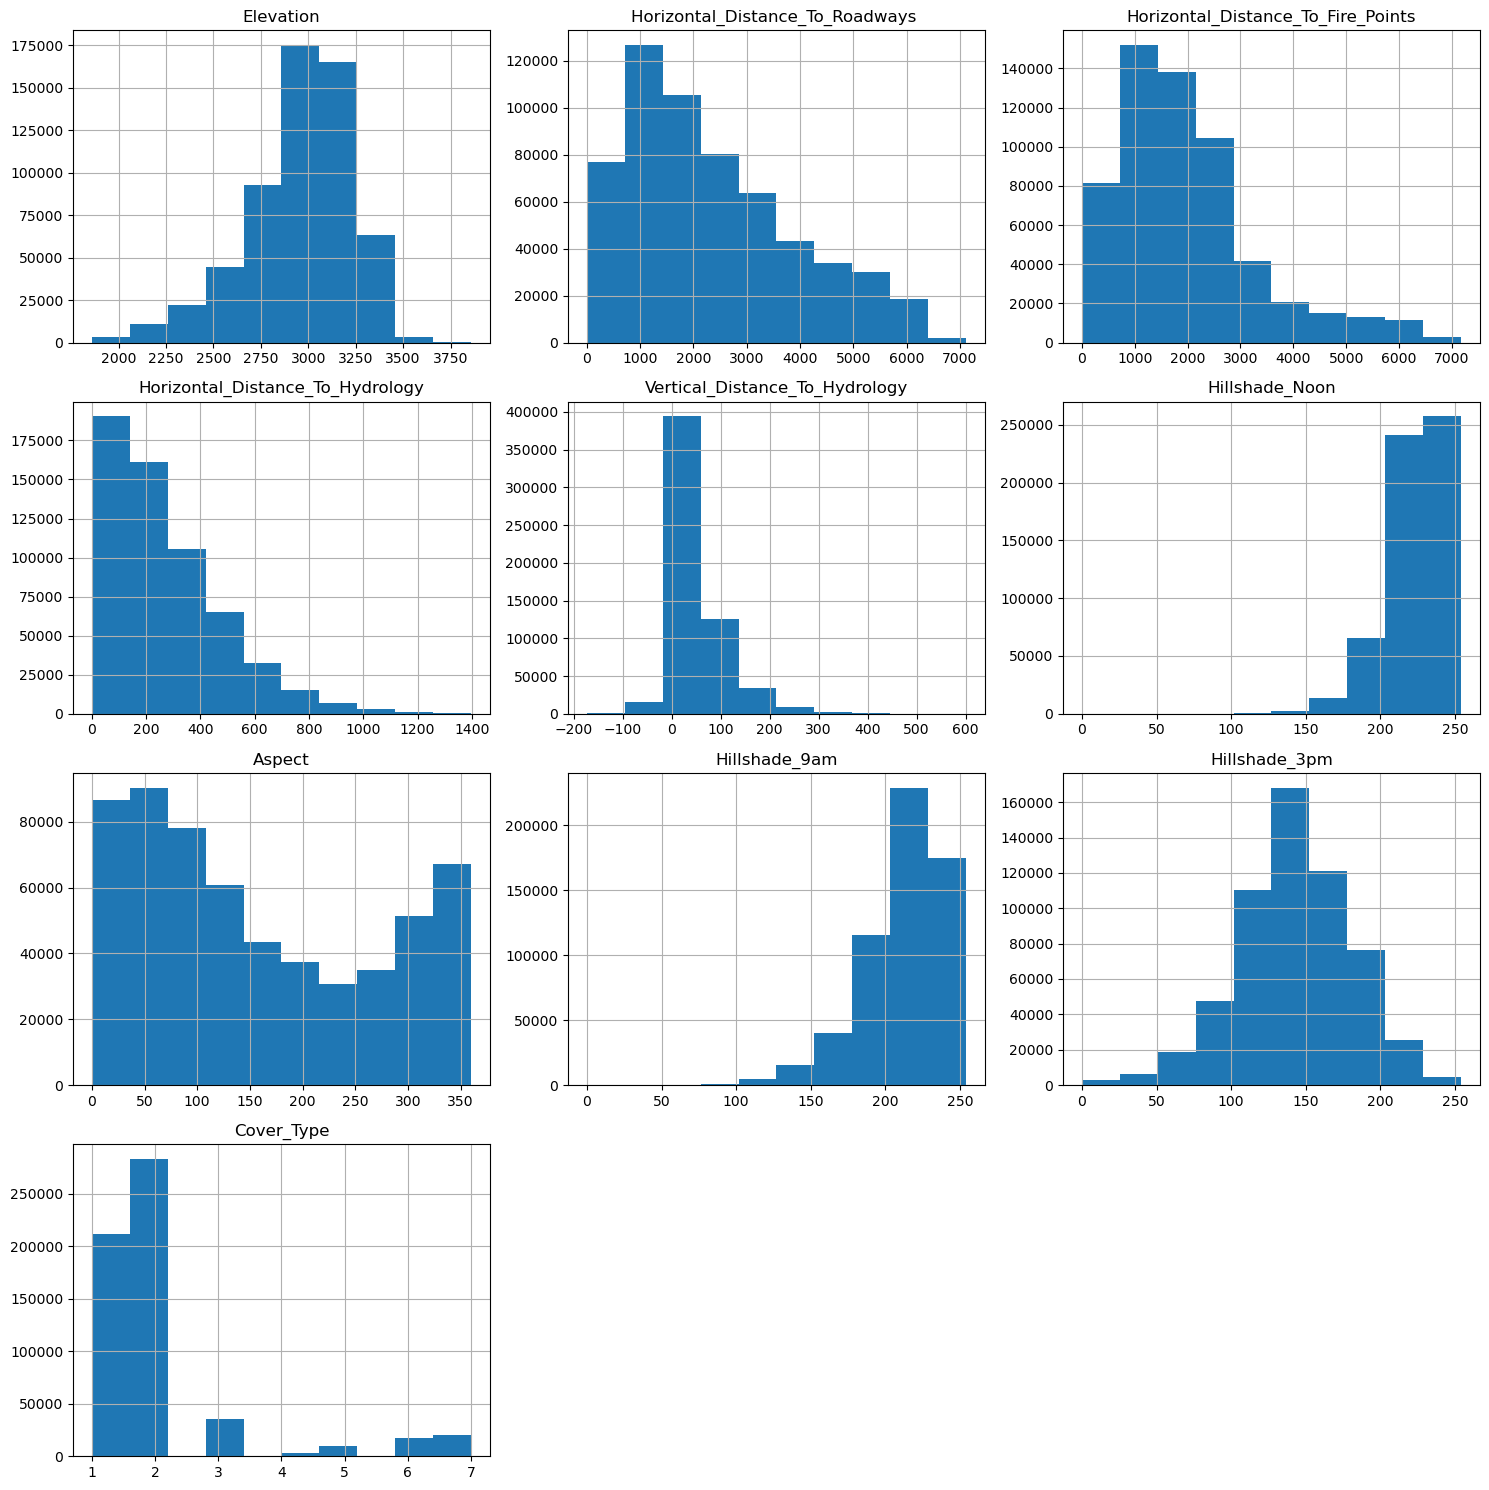

In [17]:
#histogramas
df_reducida.hist(figsize=(15, 15))
plt.tight_layout() #para que los graficos no se pongan uno encima de otro
plt.show()

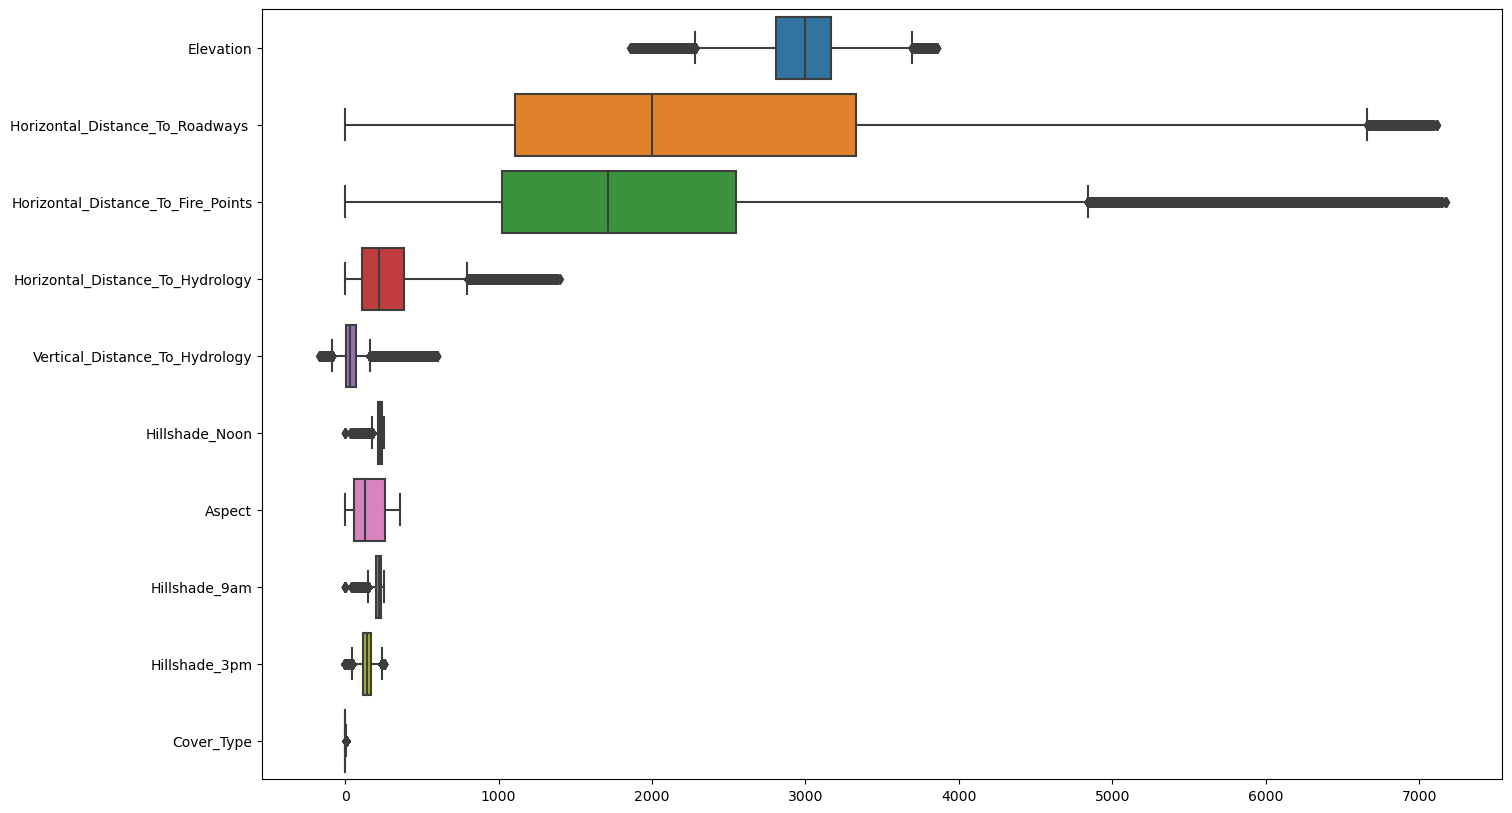

In [18]:
# graficas de violin 
plt.figure(figsize=(16,10))
sns.boxplot(data=df_reducida, orient="h")
plt.show()

In [19]:
# normalizar todas las variables 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# comenzaremos con las variables de entrada entre los valores 0 y 1
df_reducida_norm = pd.DataFrame(scaler.fit_transform(df_reducida.drop('Cover_Type', axis=1)), columns=df_reducida.drop('Cover_Type', axis=1).columns)
# la variable objetivo no la normalizamos
df_reducida_norm['Cover_Type'] = df_reducida['Cover_Type']
df_reducida_norm

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Aspect,Hillshade_9am,Hillshade_3pm,Cover_Type
0,0.368684,0.071659,0.875366,0.184681,0.223514,0.913386,0.141667,0.870079,0.582677,5
1,0.365683,0.054798,0.867838,0.151754,0.215762,0.925197,0.155556,0.866142,0.594488,5
2,0.472736,0.446817,0.853339,0.191840,0.307494,0.937008,0.386111,0.921260,0.531496,2
3,0.463232,0.434172,0.865886,0.173228,0.375969,0.937008,0.430556,0.937008,0.480315,2
4,0.368184,0.054939,0.860449,0.109520,0.222222,0.921260,0.125000,0.866142,0.590551,5
...,...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.015175,0.116688,0.060845,0.245478,0.933071,0.425000,0.944882,0.464567,3
581008,0.266133,0.013348,0.117803,0.047960,0.239018,0.933071,0.422222,0.944882,0.468504,3
581009,0.263632,0.012646,0.119058,0.042949,0.232558,0.948819,0.441667,0.929134,0.511811,3
581010,0.262631,0.012646,0.120452,0.042949,0.229974,0.964567,0.472222,0.905512,0.562992,3


In [20]:
#ahora normalizaremos la variable objetivo en valores numéricos entre 0 y el número de clases menos 1
df_reducida_norm['Cover_Type'] = df_reducida_norm['Cover_Type'] - 1
df_reducida_norm

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Aspect,Hillshade_9am,Hillshade_3pm,Cover_Type
0,0.368684,0.071659,0.875366,0.184681,0.223514,0.913386,0.141667,0.870079,0.582677,4
1,0.365683,0.054798,0.867838,0.151754,0.215762,0.925197,0.155556,0.866142,0.594488,4
2,0.472736,0.446817,0.853339,0.191840,0.307494,0.937008,0.386111,0.921260,0.531496,1
3,0.463232,0.434172,0.865886,0.173228,0.375969,0.937008,0.430556,0.937008,0.480315,1
4,0.368184,0.054939,0.860449,0.109520,0.222222,0.921260,0.125000,0.866142,0.590551,4
...,...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.015175,0.116688,0.060845,0.245478,0.933071,0.425000,0.944882,0.464567,2
581008,0.266133,0.013348,0.117803,0.047960,0.239018,0.933071,0.422222,0.944882,0.468504,2
581009,0.263632,0.012646,0.119058,0.042949,0.232558,0.948819,0.441667,0.929134,0.511811,2
581010,0.262631,0.012646,0.120452,0.042949,0.229974,0.964567,0.472222,0.905512,0.562992,2


# Ejercicio 3
Después de estandarizar los datos procedemos a crear el primer clasificador
A Divide el datset en training y en test:
- Guarda el 20% de los datos para testeo.
- random_state=100
B Entrena un modelo de regresión logística:
- Número máximo de iteraciones igual a 1000
- random_state=100
C Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
-  Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)
- Confusion matrix

A) Divide el datset en training y en test:
- Guarda el 20% de los datos para testeo.
- random_state=100
- Dividir el dataset en Training y Test set


In [21]:
#comenzamos a crear el train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


B) Entrena un modelo de regresión logística
- Número máximo de iteraciones igual a 1000
- random_state=100

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
modelo = LogisticRegression(max_iter=1000, random_state=100)
modelo.fit(X_train, y_train)


c:\Users\Usuario\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=100)

C) Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)
- Confusion matrix

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = modelo.predict(X_test)
accuary = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(classification_report(y_test, y_pred, zero_division=0))
cf= confusion_matrix(y_test, y_pred)
print(cf)


              precision    recall  f1-score   support

           1       0.67      0.70      0.68     42446
           2       0.71      0.79      0.75     56592
           3       0.63      0.64      0.63      7133
           4       0.62      0.18      0.27       571
           5       0.00      0.00      0.00      1847
           6       0.32      0.02      0.05      3456
           7       0.31      0.05      0.09      4158

    accuracy                           0.68    116203
   macro avg       0.47      0.34      0.35    116203
weighted avg       0.65      0.68      0.66    116203

[[29848 12224     0     0     0     0   374]
 [11096 44689   654     0     3    43   107]
 [    0  2395  4553    53     2   130     0]
 [    0    24   439   100     0     8     0]
 [   28  1806    10     0     0     0     3]
 [    0  1795  1568     7     0    86     0]
 [ 3798   141     0     0     0     0   219]]


# Ejercicio 4
Ahora probamos la creación de otros modelo basados en árboles de decisión:

4.1 Entrena un modelo tipo Decision Tree Classifire y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:

- random_state=100
- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
dt_classif = DecisionTreeClassifier(random_state=100)
dt_classif.fit(X_train, y_train)
y_pred = dt_classif.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(classification_report(y_test, y_pred, zero_division=0))
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)


              precision    recall  f1-score   support

           1       0.92      0.91      0.92     42446
           2       0.93      0.93      0.93     56592
           3       0.89      0.90      0.89      7133
           4       0.79      0.81      0.80       571
           5       0.77      0.78      0.78      1847
           6       0.83      0.82      0.82      3456
           7       0.91      0.91      0.91      4158

    accuracy                           0.91    116203
   macro avg       0.86      0.87      0.86    116203
weighted avg       0.91      0.91      0.91    116203

[[38824  3255     4     0    52     6   305]
 [ 3205 52501   309     1   356   168    52]
 [    2   265  6398    86    15   367     0]
 [    0     2    74   465     0    30     0]
 [   45   331    18     0  1442    11     0]
 [    5   204   370    38     4  2835     0]
 [  334    40     0     0     0     0  3784]]


4.2 Saca la curva de complejidad del modelo Decision Tree (Model Complexity Curve) y crea un nuevo clasificador con el valor óptimo de la profundidad del árbol según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.

- random_state=100
- rango de profundidades: de 2 a 30 inclusive

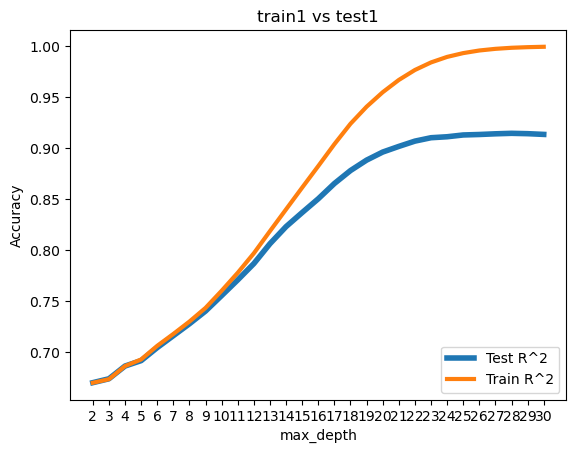

In [29]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

hiper_param = np.arange(2, 31)

train1 = np.zeros(hiper_param.size) 
test1 = np.zeros(hiper_param.size) 

for i in range(hiper_param.size):
    mod_arbol = DecisionTreeClassifier(max_depth=max_depth[i], random_state=100)
    mod_arbol.fit(X_train, y_train)
    train1[i] = accuracy_score(y_train, mod_arbol.predict(X_train)) 
    test1[i] = accuracy_score(y_test, mod_arbol.predict(X_test))    

plt.plot(hiper_param, test1, linewidth=4, label='Test R^2')
plt.plot(hiper_param, train1, linewidth=3, label='Train R^2')
plt.xticks(hiper_param)
plt.title('train1 vs test1')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


4.3 Saca la gráfica de el Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

- random_state=100
- (Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo)

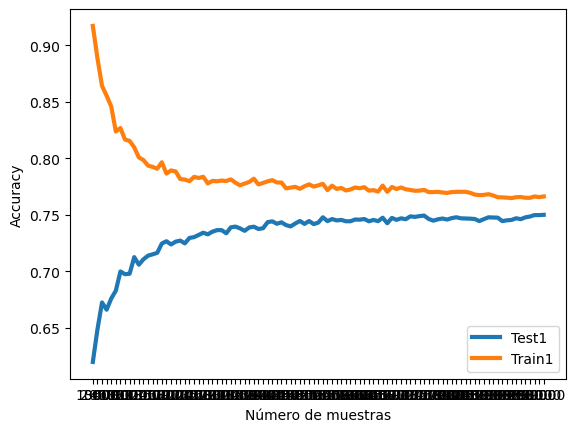

In [26]:
# el numero de muestras debe de ser minimo de 1000
def curva_aprendizaje(profundidad: int):
    hiper_param = int (profundidad)
    mod_arbol = DecisionTreeClassifier(max_depth = hiper_param, random_state=100)
    num_samples = np.arange(1000, 100000, 1000)
    train1 = np.zeros(num_samples.size)
    test1 = np.zeros(num_samples.size)
    for i, n_samples in enumerate(num_samples):
        X_train_n = X_train[:n_samples]
        y_train_n = y_train[:n_samples]
        mod_arbol.fit(X_train_n, y_train_n)
        train1[i] = accuracy_score(y_train_n, mod_arbol.predict(X_train_n))
        test1[i] = accuracy_score(y_test, mod_arbol.predict(X_test))
    plt.plot(num_samples, test1, linewidth=3, label='Test1')
    plt.plot(num_samples, train1, linewidth=3, label='Train1')
    plt.xticks(num_samples)
    plt.xlabel('Número de muestras')        
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()
curva_aprendizaje(10)

# Ejercicio 5

5.1 Entrena un modelo tipo Random Forest Classifire y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:

- random_state=100

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
rf_modelo = RandomForestClassifier(random_state=100)
rf_modelo.fit(X_train, y_train)
y_pred = rf_modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("Classification Report:\n", class_report)


Accuracy:  0.945242377563402
F1-score:  0.9448426688888046
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.94      0.95     42446
           2       0.94      0.97      0.95     56592
           3       0.93      0.94      0.93      7133
           4       0.90      0.83      0.87       571
           5       0.95      0.70      0.81      1847
           6       0.91      0.86      0.88      3456
           7       0.98      0.92      0.95      4158

    accuracy                           0.95    116203
   macro avg       0.94      0.88      0.91    116203
weighted avg       0.95      0.95      0.94    116203



5.2 Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.

In [31]:
rf_modelo = RandomForestClassifier(random_state=100)
rf_modelo.fit(X_train, y_train)
profundidad = [tree.max_depth for tree in rf_modelo.estimators_]
mediana_profundidad = np.median(profundidad)
print("La profundidad media es: ", mediana_profundidad)


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

5.3 Saca las curvas de complejidad del modelo Random Forest (Model Complexity Curve) y crea un nuevo clasificador con los valores óptimos analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.

- random_state=100
- define un rango con funciones de numpy para considerar estos números de árboles: [200, 250, 300, 350, 400]
- rango de profundidades: de 20 a 40 inclusive en pasos de 2 en 2.
- considera estas opciones para max_features : ["auto", "log2", None]
- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)
- OOB (out-of-bag score)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define el rango de valores para el número de árboles y la profundidad
n_estimators = np.array([200, 250, 300, 350, 400])
max_depths = np.arange(20, 42, 2)

# Define las opciones para el hiperparámetro max_features
max_features = ["auto", "log2", None]

# Crea una matriz para almacenar las métricas de rendimiento
# shape = (n_estimators, len(max_depths), len(max_features), 3)
# 3 es el número de métricas que vamos a calcular: accuracy, f1-score y OOB score
results = np.zeros((n_estimators.size, max_depths.size, len(max_features), 3))

# Itera sobre los hiperparámetros y almacena las métricas de rendimiento en la matriz results
for i, n in enumerate(n_estimators):
    for j, d in enumerate(max_depths):
        for k, f in enumerate(max_features):
            # Crea el clasificador con los hiperparámetros actuales
            clf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f,
                                          random_state=100, oob_score=True)
            # Entrena el modelo
            clf.fit(X_train, y_train)
            # Calcula las métricas de rendimiento en el conjunto de entrenamiento y prueba
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)
            results[i, j, k, 0] = accuracy_score(y_test, y_test_pred)
            results[i, j, k, 1] = f1_score(y_test, y_test_pred, average='weighted')
            results[i, j, k, 2] = clf.oob_score_

# Grafica la curva de complejidad para cada hiperparámetro
for i, n in enumerate(n_estimators):
    plt.plot(max_depths, results[i,:,0,0], label='n_estimators={}'.format(n))
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

for j, d in enumerate(max_depths):
    plt.plot(n_estimators, results[:,j,0,0], label='max_depth={}'.format(d))
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

for k, f in enumerate(max_features):
    plt.plot(max_depths, results[0,:,k,0], label='max_features={}'.format(f))
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Encuentra los hiperparámetros óptimos (los que maximizan la precisión en el conjunto de prueba)
best_i, best_j, best_k = np.unravel_index(np.argmax(results[:,:,:,0]), results[:,:,:,0].shape)
best_n = n_estimators[best_i]
best_d = max_depths[best_j]
best_f = max_features[best_k]
print('Best parameters: n_estimators={}, max_depth={}, max_features={}'.format(best_n, best_d, best_f))

# Crea un nuevo clasificador con los valores óptimos de los hiperparámetros y evalúa el rendimiento en el conjunto de prueba
clf = RandomForestClassifier(n_estimators=best_n, max_depth=best_d, max_features=best_f)


c:\Users\Usuario\Documents\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


5.4 Saca la gráfica del Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

- random_state=100
- (Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo)